# 파마프렌치 모델 만들기

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [25]:
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
## custom libs
from fndata import FNData

In [27]:
CWD = Path('.').resolve()
DATA_DIR = CWD / 'data'

## 데이터 불러오기

In [40]:
fn1 = DATA_DIR / '고금계과제1_v3.3_201301-202408.csv'

In [41]:
fnd = FNData(fn1)

In [42]:
items = fnd.get_items()

In [43]:
items

array(['종가(원)', '수정계수', '수정주가(원)', '수익률 (1개월)(%)', 'FnGuide Sector',
       '거래정지여부', '관리종목여부', '보통주자본금(천원)', '자본잉여금(천원)', '이익잉여금(천원)',
       '자기주식(천원)', '이연법인세부채(천원)', '매출액(천원)', '매출원가(천원)', '이자비용(천원)',
       '영업이익(천원)', '총자산(천원)', '기말발행주식수 (보통)(주)'], dtype=object)

In [44]:
close_df = fnd.get_data('종가(원)')
adjclose_df = fnd.get_data('수정주가(원)')
adjfactor_df = fnd.get_data('수정계수')
monthly_returns_df = fnd.get_data('수익률 (1개월)(%)')


In [50]:

# common_shares_listed_df = fnd.get_data('상장주식수 (보통)(주)')

# all_mkt_cap_df = fnd.get_data('시가총액 (상장예정주식수 포함)(백만원)')
# common_mkt_cap_df = fnd.get_data('시가총액 (보통-상장예정주식수 포함)(백만원)')
common_shares_outstanding_df = fnd.get_data('기말발행주식수 (보통)(주)')

common_stock_df = fnd.get_data('보통주자본금(천원)')
capital_surplus_df = fnd.get_data('자본잉여금(천원)')
retained_earnings_df = fnd.get_data('이익잉여금(천원)')
treasury_stock_df = fnd.get_data('자기주식(천원)')
deferred_tax_liabilities_df = fnd.get_data('이연법인세부채(천원)')
sales_revenue_df = fnd.get_data('매출액(천원)')
cost_of_goods_sold_df = fnd.get_data('매출원가(천원)')
interest_expense_df = fnd.get_data('이자비용(천원)')
operating_profit_df = fnd.get_data('영업이익(천원)')
total_assets_df = fnd.get_data('총자산(천원)')


In [51]:
sales_revenue_df.head()

Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200,A950210,A950220
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,220240575.0,0.0,99553272.0,347189559.0,0.0,2.329145e+09,1.897469e+09,943609131.0,3.795045e+09,1.942883e+09,...,63823847.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,220240575.0,0.0,99553272.0,347189559.0,0.0,2.329145e+09,1.897469e+09,943609131.0,3.795045e+09,1.942883e+09,...,63823847.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,220240575.0,0.0,99553272.0,347189559.0,0.0,2.329145e+09,1.897469e+09,943609131.0,3.795045e+09,1.942883e+09,...,63823847.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,220240575.0,0.0,99553272.0,347189559.0,0.0,2.329145e+09,1.897469e+09,943609131.0,3.795045e+09,1.942883e+09,...,53060470.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,220240575.0,0.0,99553272.0,347189559.0,0.0,2.329145e+09,1.897469e+09,943609131.0,3.795045e+09,1.942883e+09,...,53060470.0,45840015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# common_shares_listed_df * close_df

In [53]:
common_shares_outstanding_df * close_df

Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200,A950210,A950220
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,168426764100,NaN,59073982605,215583777000,0.0,522398796600,2223286848000,2046492191000,2737481280000,375949593000,...,83004579000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,168426764100,NaN,55613082614,225054509400,0.0,534726791800,2369190047400,1990729461000,2623419560000,375949593000,...,92084874000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,170661281700,NaN,55255058477,231534484200,0.0,577651875500,2351820618900,2130136286000,2242453415200,392194328500,...,86850351000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,188537422500,NaN,55255058477,291598866000,0.0,764755524000,2240656276500,2342034660000,2418108464000,341139445500,...,130328940000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,193565087100,NaN,57880568815,340198677000,0.0,719000920000,2209391305200,2068797283000,2349671432000,333017077750,...,133747404000,3.094000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,231272571600,NaN,41912608996,210275120900,NaN,596929688700,1409685581100,5518383603200,2365640072800,209325020300,...,79373382000,2.491061e+11,4.668949e+11,1.061064e+12,2.716683e+11,NaN,1.420457e+11,9.146743e+10,4.777644e+11,1.749954e+11
2024-06-30,225127648200,NaN,39326895672,213290800600,NaN,589221844800,1490339233750,6488913277600,2169453914400,212341899750,...,72277882700,2.414692e+11,4.549741e+11,1.098958e+12,2.809827e+11,NaN,1.357989e+11,7.559769e+10,5.198317e+11,1.581879e+11
2024-07-31,232948459800,NaN,35478392120,194648417000,NaN,599498970000,1458779108800,7571735641600,2247015884000,212109832100,...,68910527100,2.483787e+11,3.971586e+11,1.377153e+12,2.913319e+11,NaN,1.405519e+11,8.781258e+10,8.311298e+11,1.448408e+11


In [54]:
# common_mkt_cap_df

<Axes: xlabel='date'>

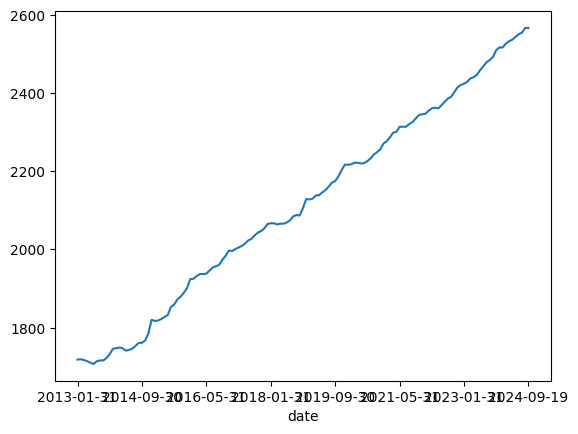

In [55]:
adjclose_df.count(axis=1).plot()

In [56]:
sector_df = fnd.get_data('FnGuide Sector')

<Axes: xlabel='date'>

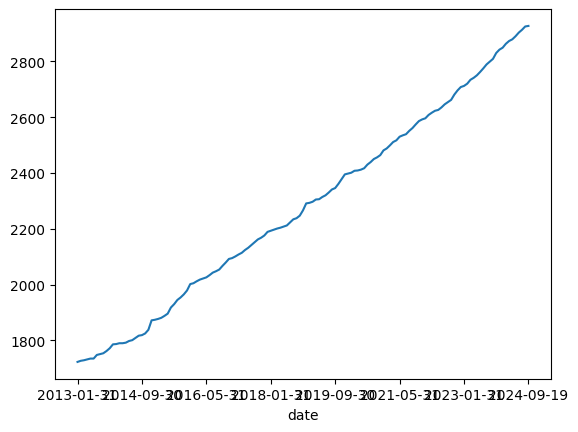

In [57]:
sector_df.count(axis=1).plot()

In [58]:
last_sector = sector_df.iloc[-1]
last_sector[last_sector != ''].count()

2522

In [59]:
last_sector.count()

2927

## Factor Construction